In [34]:
import pandas as pd
import glob

# Define the path to your CSV files
csv_files = glob.glob('fuel_prices_*.csv')  # Assumes all files start with 'fuel_price_' and are in the current directory

# Load all CSV files into a list of DataFrames
df_list = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into one DataFrame
df = pd.concat(df_list, ignore_index=True)

# Display the shape of the combined DataFrame to verify
print(df.shape)

(469336, 12)


In [35]:
df.head(20)

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,e10,1879,31/03/2024 18:20
1,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,e10,2339,16/04/2024 04:46
2,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,LPG,1119,31/03/2024 18:20
3,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Premium Diesel,1999,31/03/2024 18:20
4,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,PULP 98 RON,2109,31/03/2024 18:20
5,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,PULP 98 RON,2569,16/04/2024 04:46
6,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Unleaded,1899,31/03/2024 18:20
7,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Unleaded,2359,16/04/2024 04:46
8,61401008,EG Ampol Oxenford,EG Ampol,116 Old Pacific Highway,Oxenford,QLD,4210,-27.891217,153.313369,e10,1849,31/03/2024 14:00
9,61401008,EG Ampol Oxenford,EG Ampol,116 Old Pacific Highway,Oxenford,QLD,4210,-27.891217,153.313369,e10,1859,09/04/2024 01:15


In [36]:
import pandas as pd

# Step 0: Data Cleaning
cleaned_fuel_data = df[df['Price'] != 9999]

# Remove outliers using the IQR method
Q1 = cleaned_fuel_data['Price'].quantile(0.25)
Q3 = cleaned_fuel_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_fuel_data = cleaned_fuel_data[(cleaned_fuel_data['Price'] >= lower_bound) & (cleaned_fuel_data['Price'] <= upper_bound)]

# Convert 'TransactionDateutc' to datetime format and truncate to date
cleaned_fuel_data['TransactionDateutc'] = pd.to_datetime(cleaned_fuel_data['TransactionDateutc'], format="%d/%m/%Y %H:%M").dt.date

# Step 1: Aggregating Daily Prices (min, median, max) per fuel type
daily_fuel_prices = cleaned_fuel_data.groupby([pd.Grouper(key='TransactionDateutc'), 'Fuel_Type'])['Price'].agg(['min', 'median', 'max']).reset_index()

# Load crude oil prices and clean up the data
crude_oil_data = pd.read_csv('Crude Oil WTI Futures Historical Data.csv')
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'], format="%m/%d/%Y").dt.date
crude_oil_data_clean = crude_oil_data[['Date', 'Price']].dropna()

# Merge fuel prices with crude oil data
merged_data = pd.merge(daily_fuel_prices, crude_oil_data_clean, left_on='TransactionDateutc', right_on='Date', how='inner')

# Step 2: Clean TGP Petrol and Diesel Data

# TGP petrol data
tgp_petrol_data.columns = ['Date', 'Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Darwin', 'Hobart', 'National_Average_Petrol']
tgp_petrol_data['Date'] = pd.to_datetime(tgp_petrol_data['Date'], format='%A, %B %d, %Y').dt.date

# TGP diesel data
tgp_diesel_data.columns = ['Date', 'Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Darwin', 'Hobart', 'National_Average_Diesel']
tgp_diesel_data['Date'] = pd.to_datetime(tgp_diesel_data['Date'], format='%A, %B %d, %Y').dt.date

# Step 3: Merging with TGP Data

# Merge petrol TGP
merged_data_with_tgp = pd.merge(merged_data, tgp_petrol_data[['Date', 'National_Average_Petrol']], on='Date', how='left')

# Merge diesel TGP
merged_data_with_tgp = pd.merge(merged_data_with_tgp, tgp_diesel_data[['Date', 'National_Average_Diesel']], on='Date', how='left')

# Step 4: Aligning TGP values with Fuel Types

# Create a column that selects Petrol TGP for petrol-based fuels and Diesel TGP for diesel-based fuels
merged_data_with_tgp['TGP'] = merged_data_with_tgp.apply(
    lambda row: row['National_Average_Petrol'] if 'Petrol' in row['Fuel_Type'] or 'Unleaded' in row['Fuel_Type'] or 'PULP' in row['Fuel_Type']
                else row['National_Average_Diesel'] if 'Diesel' in row['Fuel_Type'] else None, axis=1)

merged_data_with_tgp['National_Average_Diesel'] = merged_data_with_tgp['National_Average_Diesel'] * 10
merged_data_with_tgp['National_Average_Petrol'] = merged_data_with_tgp['National_Average_Petrol'] * 10
merged_data_with_tgp['TGP'] = merged_data_with_tgp['TGP'] * 10
# Display the merged dataset with aligned TGP
print(merged_data_with_tgp.head())

  TransactionDateutc       Fuel_Type   min  median   max        Date  Price   
0         2024-01-01          Diesel  1735  1899.5  2100  2024-01-01  71.97  \
1         2024-01-01  PULP 95/96 RON  1767  1879.0  2299  2024-01-01  71.97   
2         2024-01-01     PULP 98 RON  1825  1952.0  2399  2024-01-01  71.97   
3         2024-01-01  Premium Diesel  1719  1949.0  2199  2024-01-01  71.97   
4         2024-01-01        Unleaded  1625  1739.0  2099  2024-01-01  71.97   

   National_Average_Petrol  National_Average_Diesel     TGP  
0                   1660.0                   1749.0  1749.0  
1                   1660.0                   1749.0  1660.0  
2                   1660.0                   1749.0  1660.0  
3                   1660.0                   1749.0  1749.0  
4                   1660.0                   1749.0  1660.0  


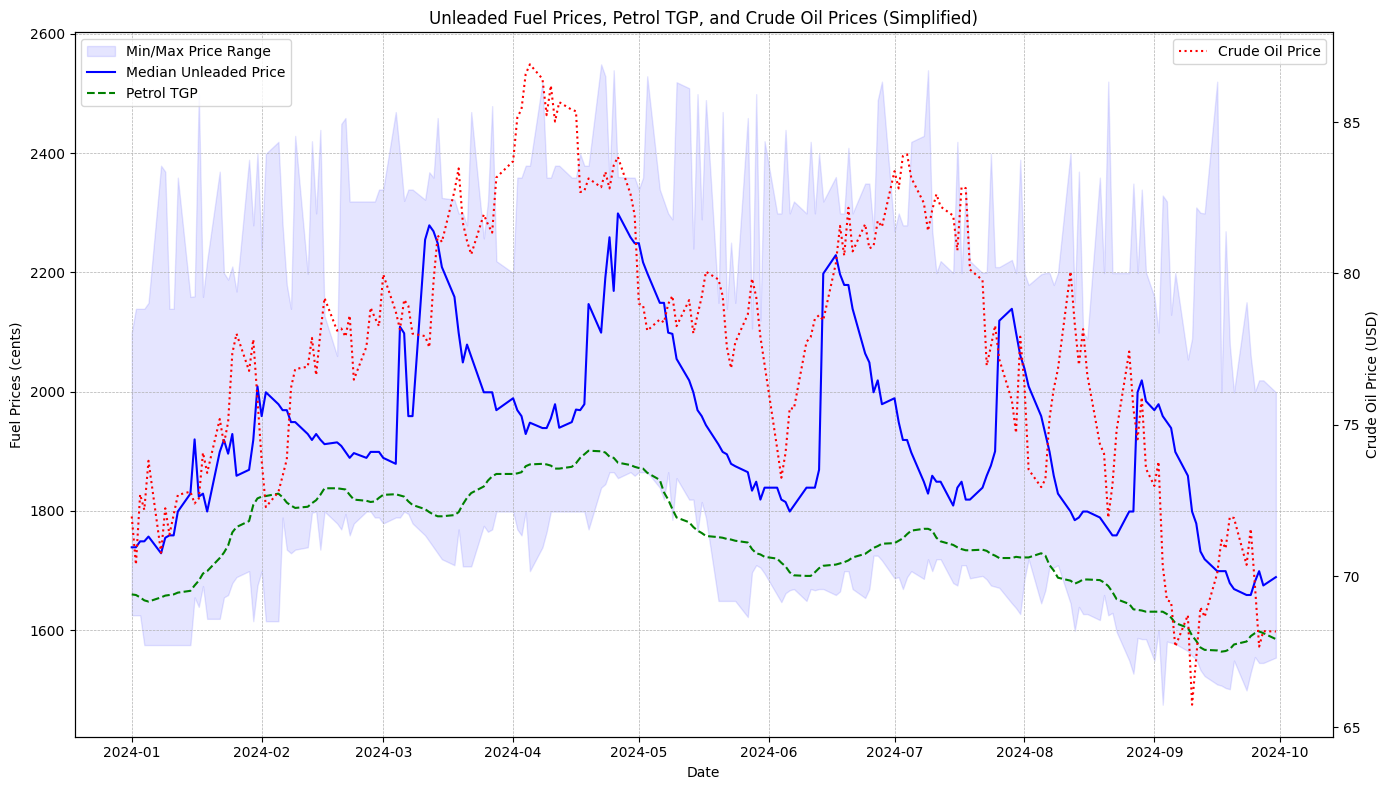

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the data for Unleaded fuel
unleaded_data = merged_data_with_tgp[merged_data_with_tgp['Fuel_Type'] == 'Unleaded']

# Step 2: Set up the plot
plt.figure(figsize=(14, 8))

# Plotting Min/Max Price Band with faint color
plt.fill_between(
    unleaded_data['TransactionDateutc'], 
    unleaded_data['min'], 
    unleaded_data['max'], 
    color='blue', 
    alpha=0.1, 
    label='Min/Max Price Range'
)

# Plotting Median Unleaded price
sns.lineplot(x='TransactionDateutc', y='median', data=unleaded_data, label='Median Unleaded Price', color='blue')

# Plotting Petrol TGP with a different line style
sns.lineplot(x='TransactionDateutc', y='TGP', data=unleaded_data, label='Petrol TGP', color='green', linestyle='--')

# Step 3: Create a secondary y-axis for crude oil prices
ax = plt.gca()  # Get the current axis
ax2 = ax.twinx()  # Create a twin axis sharing the same x-axis

# Plotting Crude Oil Prices on the secondary y-axis
sns.lineplot(x='TransactionDateutc', y='Price', data=unleaded_data, label='Crude Oil Price', ax=ax2, color='red', linestyle=':')

# Step 4: Adding gridlines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Labels and Legends
ax.set_xlabel('Date')
ax.set_ylabel('Fuel Prices (cents)')
ax2.set_ylabel('Crude Oil Price (USD)')
plt.title('Unleaded Fuel Prices, Petrol TGP, and Crude Oil Prices (Simplified)')

# Adding legends for both y-axes
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Step 5: Show the plot
plt.tight_layout()
plt.show()

In [38]:
# Step 0: Data Cleaning and Preparation

# Remove rows with price 9999, which indicates no stock
cleaned_fuel_data = df[df['Price'] != 9999]

# Remove outliers using the IQR method
Q1 = cleaned_fuel_data['Price'].quantile(0.25)
Q3 = cleaned_fuel_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_fuel_data = cleaned_fuel_data[(cleaned_fuel_data['Price'] >= lower_bound) & (cleaned_fuel_data['Price'] <= upper_bound)]

# Convert the 'TransactionDateutc' to datetime format for further processing
cleaned_fuel_data['TransactionDateutc'] = pd.to_datetime(cleaned_fuel_data['TransactionDateutc'], format="%d/%m/%Y %H:%M")

# Step 1: Aggregating Daily Prices (min, median, max) per fuel type and retaining latitude/longitude
daily_fuel_prices = cleaned_fuel_data.groupby(
    [pd.Grouper(key='TransactionDateutc', freq='D'), 'Fuel_Type', 'Site_Latitude', 'Site_Longitude']
)['Price'].agg(['min', 'median', 'max']).reset_index()

# Step 2: Merge the crude oil price data and TGP data

# Load crude oil data
crude_oil_data = pd.read_csv('Crude Oil WTI Futures Historical Data.csv')
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'], format="%m/%d/%Y")
crude_oil_data_clean = crude_oil_data[['Date', 'Price']].dropna()

# Merge fuel prices with crude oil data
merged_data = pd.merge(daily_fuel_prices, crude_oil_data_clean, left_on='TransactionDateutc', right_on='Date', how='inner')

# Load TGP data (petrol and diesel)
tgp_petrol_data = pd.read_csv('Petrol TGP-Table 1.csv')
tgp_diesel_data = pd.read_csv('Diesel TGP-Table 1.csv')

# Merge with TGP petrol data
merged_data_with_tgp = pd.merge(merged_data, tgp_petrol_data, left_on='TransactionDateutc', right_on='Date', how='left')

# Step 3: Retain latitude and longitude columns in final merged data
merged_data_with_tgp = merged_data_with_tgp[['TransactionDateutc', 'Fuel_Type', 'min', 'median', 'max', 'Site_Latitude', 'Site_Longitude', 'Price', 'AVERAGE ULP TGPS\n(inclusive of GST)']]

KeyError: 'Date'

In [33]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Step 1: Load your fuel price data (assuming it contains latitude, longitude, and price)
# unleaded_data should have 'Site_Latitude', 'Site_Longitude', and 'Price'
unleaded_data = merged_data_with_tgp[merged_data_with_tgp['Fuel_Type'] == 'Unleaded']

# Step 2: Create a map centered on the region (e.g., Brisbane)
m = folium.Map(location=[-27.4698, 153.0251], zoom_start=10)

# Step 3: Create a marker cluster to handle station markers
marker_cluster = MarkerCluster().add_to(m)

# Step 4: Add markers for each station
for _, row in unleaded_data.iterrows():
    folium.Marker(
        location=[row['Site_Latitude'], row['Site_Longitude']],
        popup=f"Price: {row['median']} cents",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Step 5: Display the map
m.save("fuel_price_map.html")
m

KeyError: 'Site_Latitude'

In [3]:
import pandas as pd

# Step 1: Group by SiteId and check for multiple Site_Name or Site_Brand values
multiple_names_or_brands = df.groupby('SiteId').agg(
    Unique_Site_Names=('Site_Name', 'nunique'),  # Count unique Site_Name values
    Unique_Site_Brands=('Site_Brand', 'nunique')  # Count unique Site_Brand values
).reset_index()

# Step 2: Filter for SiteIds that have more than 1 unique Site_Name or Site_Brand
site_ids_with_issues = multiple_names_or_brands[(multiple_names_or_brands['Unique_Site_Names'] > 1) |
                                                (multiple_names_or_brands['Unique_Site_Brands'] > 1)]

# Output: SiteIds with multiple Site_Name or Site_Brand values
print(site_ids_with_issues)

        SiteId  Unique_Site_Names  Unique_Site_Brands
56    61401149                  2                   2
80    61401206                  2                   3
95    61401248                  1                   2
98    61401252                  2                   2
111   61401280                  2                   2
...        ...                ...                 ...
1589  61478051                  2                   3
1607  61478098                  2                   3
1614  61478112                  2                   1
1666  61478229                  1                   2
1672  61478236                  1                   2

[94 rows x 3 columns]


In [15]:
import pandas as pd

# Step 1: Convert TransactionDateutc to datetime
df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], format='%d/%m/%Y %H:%M')

# Step 2: Sort by SiteId and TransactionDateutc to ensure chronological order
df.sort_values(['SiteId', 'TransactionDateutc'], inplace=True)

# Step 3: Group by SiteId, Site_Name, Site_Brand and get the first and last transaction dates
site_info_history = df.groupby(['SiteId', 'Site_Name', 'Site_Brand']).agg(
    First_Seen=('TransactionDateutc', 'min'),
    Last_Seen=('TransactionDateutc', 'max'),
    Site_Address=('Sites_Address_Line_1', 'first'),
    Site_Suburb=('Site_Suburb', 'first'),
    Site_State=('Site_State', 'first'),
    Site_Latitude=('Site_Latitude', 'first'),
    Site_Longitude=('Site_Longitude', 'first'),
    Fuel_Types=('Fuel_Type', lambda x: ', '.join(sorted(x.unique())))
).reset_index()

# Step 4: For each SiteId, collect the name and brand changes as a history
site_history = site_info_history.groupby('SiteId').agg(
    Site_Name_History=('Site_Name', lambda x: list(x.unique())),
    Site_Brand_History=('Site_Brand', lambda x: list(x.unique())),
    Name_Change_Dates=('First_Seen', list),  # Capture the change dates
    Last_Change_Dates=('Last_Seen', list),
    Site_Address=('Site_Address', 'first'),
    Site_Suburb=('Site_Suburb', 'first'),
    Site_State=('Site_State', 'first'),
    Site_Latitude=('Site_Latitude', 'first'),
    Site_Longitude=('Site_Longitude', 'first'),
    Fuel_Types=('Fuel_Types', 'first')
).reset_index()

# Output: Site history with names, brands, and dates
print(site_history.head())

     SiteId       Site_Name_History Site_Brand_History      Name_Change_Dates   
0  61290151         [Liberty Surat]          [Liberty]  [2024-01-11 05:28:00]  \
1  61291313    [Lowes Mungindi Opt]               [BP]  [2024-01-18 21:41:00]   
2  61401007      [7-Eleven Coomera]         [7 Eleven]  [2023-12-31 18:20:00]   
3  61401008     [EG Ampol Oxenford]         [EG Ampol]  [2024-01-01 19:11:00]   
4  61401010  [Coles Express Nerang]    [Coles Express]  [2024-01-08 23:00:00]   

       Last_Change_Dates             Site_Address Site_Suburb Site_State   
0  [2024-08-23 23:49:00]       61 Burrowes Street       Surat        QLD  \
1  [2024-09-18 22:00:00]        126 Barwon Street    Mungindi        QLD   
2  [2024-09-30 04:44:00]          Pacific Highway     Coomera        QLD   
3  [2024-09-30 03:15:00]  116 Old Pacific Highway    Oxenford        QLD   
4  [2024-09-26 01:30:00]         6-8 Ferry Street      Nerang        QLD   

   Site_Latitude  Site_Longitude   
0     -27.151687    

In [17]:

# Step 1: Filter sites where the number of unique names is more than 2
sites_with_name_changes = site_history[site_history['Site_Name_History'].apply(len) > 1]

# Step 2: Print the relevant columns: SiteId and Site_Name_History
print(sites_with_name_changes[['SiteId', 'Site_Name_History']])

        SiteId                                  Site_Name_History
56    61401149  [Coles Express Tingalpa, Shell Reddy Express T...
80    61401206        [Ampol Foodary Park Ridge, U-Go Park Ridge]
98    61401252  [Ampol Foodary Bracken Ridge, U-Go Bracken Ridge]
111   61401280  [Coles Express Geebung, Shell Reddy Express Ge...
127   61401328                   [BP Edinburgh Castle, BP Kedron]
...        ...                                                ...
1550  61478008  [7-Eleven Rasmussen, Fresh Trading Co. Mobil R...
1577  61478039  [Atlas Fuel Yeppoon, Mobil Fresh Trading Co. S...
1589  61478051  [Atlas Fuel Gympie, Fresh Trading Co. Mobil Gy...
1607  61478098  [Atlas Fuel St Helens, Fresh Trading Co. St He...
1614  61478112          [Ampol Windsor, Ampol Woolworths Windsor]

[83 rows x 2 columns]


In [11]:
import pandas as pd

# Assuming df is the original dataframe with site information and price data

# Step 1: Convert TransactionDateutc to datetime format
df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], format='%d/%m/%Y %H:%M')

# Step 2: Group by SiteId and aggregate site information
site_info = df.groupby('SiteId').agg(
    Site_Name=('Site_Name', 'first'),
    Site_Brand=('Site_Brand', 'first'),
    Site_Address=('Sites_Address_Line_1', 'first'),
    Site_Suburb=('Site_Suburb', 'first'),
    Site_State=('Site_State', 'first'),
    Site_Latitude=('Site_Latitude', 'first'),
    Site_Longitude=('Site_Longitude', 'first'),
    Fuel_Types=('Fuel_Type', lambda x: ', '.join(sorted(x.unique()))),  # Unique selling fuel types
    Last_Price_Update=('TransactionDateutc', 'max')  # Last price update
).reset_index()

# Output: The site information with selling fuel types and last price update
print(site_info.head())

     SiteId             Site_Name     Site_Brand             Site_Address   
0  61290151         Liberty Surat        Liberty       61 Burrowes Street  \
1  61291313    Lowes Mungindi Opt             BP        126 Barwon Street   
2  61401007      7-Eleven Coomera       7 Eleven          Pacific Highway   
3  61401008     EG Ampol Oxenford       EG Ampol  116 Old Pacific Highway   
4  61401010  Coles Express Nerang  Coles Express         6-8 Ferry Street   

  Site_Suburb Site_State  Site_Latitude  Site_Longitude   
0       Surat        QLD     -27.151687      149.067742  \
1    Mungindi        QLD     -28.973467      148.983829   
2     Coomera        QLD     -27.868591      153.314206   
3    Oxenford        QLD     -27.891217      153.313369   
4      Nerang        QLD     -27.990022      153.337183   

                                          Fuel_Types   Last_Price_Update  
0                      Diesel, PULP 98 RON, Unleaded 2024-08-23 23:49:00  
1                               

In [7]:
import pandas as pd

# Step 1: Convert TransactionDateutc to datetime format
df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], format='%d/%m/%Y %H:%M')

# Step 2: Set the index to TransactionDateutc for time-based operations
df.set_index('TransactionDateutc', inplace=True)

# Step 3: Group by SiteId and Fuel_Type, then resample by day and calculate the mean price
# Resampling by day ('D')
df_resampled_daily = df.groupby(['SiteId', 'Fuel_Type']).resample('D').agg({'Price': 'mean'}).reset_index()

# Step 4 (Optional): Handle missing values with forward-fill
df_resampled_daily['Price'] = df_resampled_daily.groupby(['SiteId', 'Fuel_Type'])['Price'].ffill()

# Output: the normalized price per SiteId and Fuel_Type, per day
print(df_resampled_daily.head())

     SiteId Fuel_Type TransactionDateutc   Price
0  61290151    Diesel         2024-01-11  1899.0
1  61290151    Diesel         2024-01-12  1899.0
2  61290151    Diesel         2024-01-13  1899.0
3  61290151    Diesel         2024-01-14  1899.0
4  61290151    Diesel         2024-01-15  1899.0


/var/folders/wz/zmc0gwmn2n57xys67hh2y13c0000gn/T/ipykernel_2304/2841950886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], format='%d/%m/%Y %H:%M')
/var/folders/wz/zmc0gwmn2n57xys67hh2y13c0000gn/T/ipykernel_2304/2841950886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['TransactionDateutc'].dt.to_period('M')


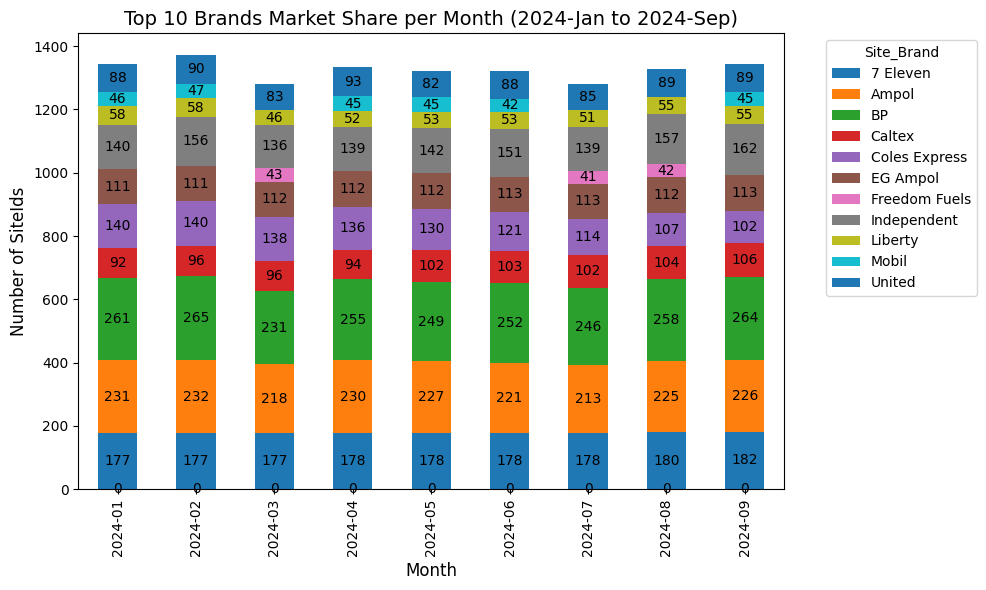

In [19]:
import matplotlib.pyplot as plt

# Convert 'TransactionDateutc' to datetime and extract the month and year
df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], format='%d/%m/%Y %H:%M')
df['month'] = df['TransactionDateutc'].dt.to_period('M')

# Filter out data for 2024 only
df = df[df['TransactionDateutc'].dt.year == 2024]

# Group by month and brand, counting unique SiteId per brand
brand_market_share = df.groupby(['month', 'Site_Brand'])['SiteId'].nunique().reset_index()

# Get top 5 brands per month
top_5_brands_per_month = brand_market_share.groupby('month').apply(lambda x: x.nlargest(10, 'SiteId')).reset_index(drop=True)

# Pivot the data for plotting (so that each brand becomes a column)
pivot_df = top_5_brands_per_month.pivot(index='month', columns='Site_Brand', values='SiteId').fillna(0)

# Plot a stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Top 10 Brands Market Share per Month (2024-Jan to 2024-Sep)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of SiteIds', fontsize=12)
plt.legend(title='Site_Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add market share values inside each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:

# Filter to keep only the last transaction of each month (end of month snapshot)
snapshot_df = df.sort_values(by='TransactionDateutc').groupby(['SiteId', 'month']).last().reset_index()

# Select the required columns
snapshot_df = snapshot_df[['SiteId', 'Site_Name', 'Site_Brand', 'Sites_Address_Line_1', 'Site_Suburb', 'Site_Latitude', 
                           'Site_Longitude', 'Fuel_Type', 'Price', 'month']]

print(snapshot_df)

In [15]:
# Count the number of unique SiteIds for each month in snapshot_df
site_counts_per_month = snapshot_df.groupby('month')['SiteId'].nunique()

# Display the result
print(site_counts_per_month)

month
2023-12     568
2024-01    1554
2024-02    1582
2024-03    1460
2024-04    1536
2024-05    1537
2024-06    1555
2024-07    1507
2024-08    1576
2024-09    1596
Freq: M, Name: SiteId, dtype: int64


In [14]:
df_jan = (snapshot_df[snapshot_df['month']=='2024-01'])
print(df_jan)

         SiteId                   Site_Name     Site_Brand   
0      61290151               Liberty Surat        Liberty  \
5      61291313          Lowes Mungindi Opt             BP   
14     61401007            7-Eleven Coomera       7 Eleven   
23     61401008           EG Ampol Oxenford       EG Ampol   
32     61401010        Coles Express Nerang  Coles Express   
...         ...                         ...            ...   
14345  61478213            Caltex Willawong         Caltex   
14354  61478214                   Arek Fuel    Independent   
14363  61478216                 Mobil Dalby          Mobil   
14372  61478217  Helidon Mechanical Service    Independent   
14397  61478220       EG Ampol Ripley South       EG Ampol   

          Sites_Address_Line_1   Site_Suburb  Site_Latitude  Site_Longitude   
0           61 Burrowes Street         Surat     -27.151687      149.067742  \
5            126 Barwon Street      Mungindi     -28.973467      148.983829   
14             Pac

                   count         mean          std     min     25%     50%   
Fuel_Type                                                                    
Diesel           29971.0  2033.147009   935.485307     1.0  1865.0  1939.0  \
LPG               1619.0  2112.419395  2760.876212    99.0  1099.0  1149.0   
OPAL                38.0  2141.894737    81.104134  2049.0  2089.0  2124.0   
PULP 95/96 RON   81183.0  2123.914945   454.057190     2.0  1969.0  2089.0   
PULP 98 RON     103333.0  2210.752441   521.735112     1.0  2049.0  2169.0   
Premium Diesel   42927.0  1991.432525   547.147158   182.0  1897.0  1969.0   
Unleaded        114389.0  1981.603013   547.140106     1.0  1819.0  1929.0   
e10              95632.0  1956.885248   503.726816    89.0  1799.0  1909.0   
e85                244.0  2233.163934   499.547554  2179.0  2199.0  2199.0   

                   75%     max  
Fuel_Type                       
Diesel          1999.0  9999.0  
LPG             1229.0  9999.0  
OPAL     

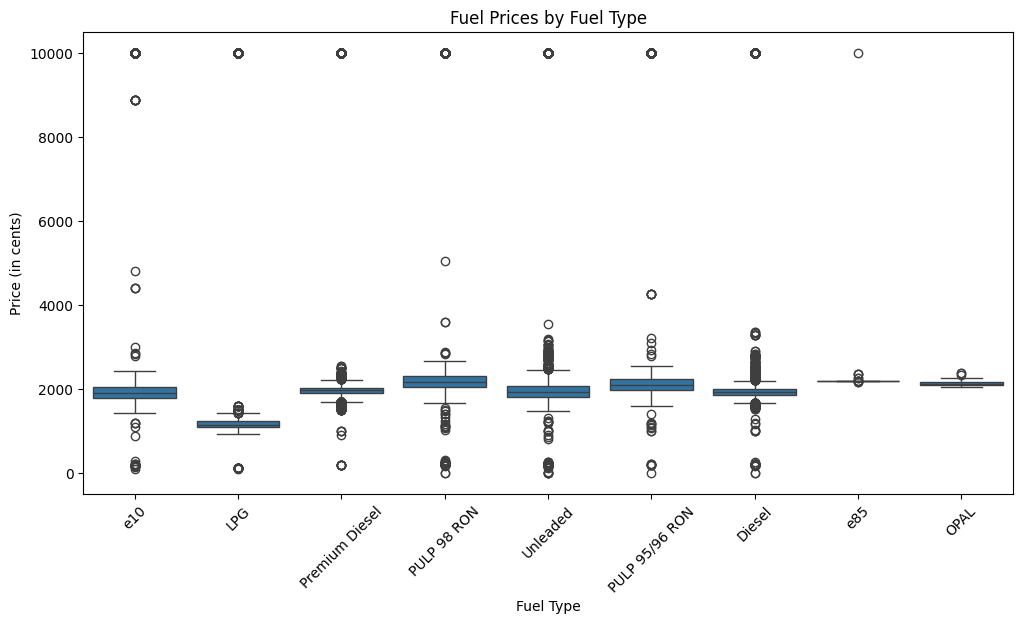

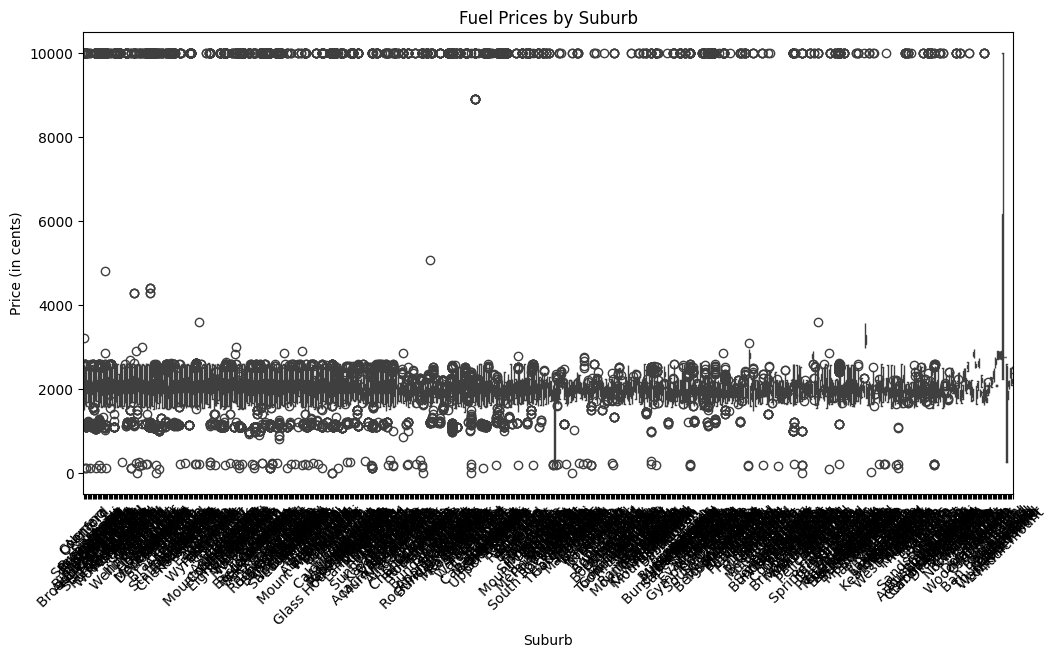

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'], format='%d/%m/%Y %H:%M')

# Descriptive statistics per Fuel Type
fuel_type_stats = df.groupby('Fuel_Type')['Price'].describe()
print(fuel_type_stats)

# Descriptive statistics per Suburb
suburb_stats = df.groupby('Site_Suburb')['Price'].describe()
print(suburb_stats)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Fuel Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in cents)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Site_Suburb', y='Price', data=df)
plt.title('Fuel Prices by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Price (in cents)')
plt.xticks(rotation=45)
plt.show()



In [5]:
import pandas as pd
from scipy import stats

# Step 1: Calculate Z-scores
df['Z_Score'] = stats.zscore(df['Price'])

# Step 2: Create a DataFrame for outliers (Z-score > 3 or < -3)
outliers = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]

# Display the outliers DataFrame
print("Outliers DataFrame:")
print(outliers[['SiteId', 'Site_Name', 'Fuel_Type', 'Price', 'Z_Score']])

# Step 1: Count occurrences of each Site_Name in the outliers DataFrame
site_counts = outliers['Site_Name'].value_counts()

# Step 2: Convert to DataFrame for easier manipulation and ranking
site_counts_df = site_counts.reset_index()
site_counts_df.columns = ['Site_Name', 'Count']

# Step 3: Sort the DataFrame by Count in descending order
site_counts_df = site_counts_df.sort_values(by='Count', ascending=False)

# Display the ranked site names
print("Ranked Site Names:")
print(site_counts_df)

Outliers DataFrame:
          SiteId            Site_Name       Fuel_Type  Price    Z_Score
297     61401030         Metro Nerang             e10   9999  13.625624
300     61401030         Metro Nerang  Premium Diesel   9999  13.625624
306     61401030         Metro Nerang  PULP 95/96 RON   9999  13.625624
308     61401030         Metro Nerang  PULP 95/96 RON   9999  13.625624
312     61401030         Metro Nerang  PULP 95/96 RON   9999  13.625624
...          ...                  ...             ...    ...        ...
469183  61478209  7-Eleven Aitkenvale             e10   9999  13.625624
469190  61478209  7-Eleven Aitkenvale  Premium Diesel   9999  13.625624
469201  61478209  7-Eleven Aitkenvale  PULP 95/96 RON   9999  13.625624
469212  61478209  7-Eleven Aitkenvale     PULP 98 RON   9999  13.625624
469223  61478209  7-Eleven Aitkenvale        Unleaded   9999  13.625624

[2431 rows x 5 columns]
Ranked Site Names:
                                     Site_Name  Count
0                 

In [6]:
print(outliers[outliers['Site_Name']=='BP Moss Marine'])

          SiteId       Site_Name Site_Brand Sites_Address_Line_1   
73823   61470850  BP Moss Marine         BP     2-12 Hamilton St  \
73829   61470850  BP Moss Marine         BP     2-12 Hamilton St   
73832   61470850  BP Moss Marine         BP     2-12 Hamilton St   
348452  61470850  BP Moss Marine         BP         Harbour Road   
348453  61470850  BP Moss Marine         BP         Harbour Road   
348454  61470850  BP Moss Marine         BP         Harbour Road   

         Site_Suburb Site_State  Site_Post_Code  Site_Latitude   
73823   North Mackay        QLD            4740     -21.119696  \
73829   North Mackay        QLD            4740     -21.119696   
73832   North Mackay        QLD            4740     -21.119696   
348452        Mackay        QLD            4740     -21.119776   
348453        Mackay        QLD            4740     -21.119776   
348454        Mackay        QLD            4740     -21.119776   

        Site_Longitude       Fuel_Type  Price  TransactionDa

In [7]:
# Step 1: Count total occurrences of each Site_Name in the original DataFrame
total_site_counts = df['Site_Name'].value_counts()

# Step 2: Convert to DataFrame for easier manipulation
total_site_counts_df = total_site_counts.reset_index()
total_site_counts_df.columns = ['Site_Name', 'Total_Count']

# Step 3: Merge outlier counts with total counts
merged_df = site_counts_df.merge(total_site_counts_df, on='Site_Name', how='left')

# Step 4: Calculate the percentage of outliers
merged_df['Outlier_Percentage'] = (merged_df['Count'] / merged_df['Total_Count']) * 100

# Step 5: Sort the DataFrame by percentage in descending order
merged_df = merged_df.sort_values(by='Outlier_Percentage', ascending=False)

# Display the results
print("Site Counts with Outlier Percentage:")
print(merged_df[['Site_Name', 'Total_Count', 'Count', 'Outlier_Percentage']])

Site Counts with Outlier Percentage:
                         Site_Name  Total_Count  Count  Outlier_Percentage
0               BP Seymours Toyota           74     74          100.000000
143            United Slacks Creek            5      5          100.000000
224  Laidley North Service Station            3      3          100.000000
276           Simpson Desert Oasis            4      2           50.000000
236             Mobil Port Douglas            9      3           33.333333
..                             ...          ...    ...                 ...
310    Coles Express Windsor (Qld)          973      1            0.102775
332           Freedom Fuels Goodna          996      1            0.100402
279         Freedom Fuels Kawungan         2607      2            0.076717
401                Rapid Petroleum         1350      1            0.074074
376                7-Eleven Aspley         1393      1            0.071788

[432 rows x 4 columns]


In [8]:
# Step 1: Get distinct SiteIds and Site_Names from the outliers DataFrame
distinct_ids = outliers[['SiteId', 'Site_Name']].drop_duplicates()

# Step 2: Create a mapping from SiteId to Site_Name
id_to_name_mapping = distinct_ids.groupby('SiteId')['Site_Name'].unique().reset_index()

# Step 3: Filter out SiteIds that have more than one unique Site_Name
mismatched_sites = id_to_name_mapping[id_to_name_mapping['Site_Name'].str.len() > 1]

# Display the mismatched sites
print("Mismatched SiteIds and Site_Names:")
print(mismatched_sites)

Mismatched SiteIds and Site_Names:
       SiteId                                          Site_Name
23   61401149  [Coles Express Tingalpa, Shell Reddy Express T...
31   61401206        [Ampol Foodary Park Ridge, U-Go Park Ridge]
43   61401280  [Shell Reddy Express Geebung, Coles Express Ge...
49   61401398  [Coles Express Mount Gravatt, Shell Reddy Expr...
73   61401530  [Coles Express Coorparoo, Shell Reddy Express ...
87   61401613          [Ampol Foodary Cleveland, U-Go Cleveland]
116  61401794  [Coles Express Caloundra, Shell Reddy Express ...
118  61401798  [Coles Express Kawana, Shell Reddy Express Kaw...
120  61401806  [Shell Reddy Express Mooloolaba, Coles Express...
123  61401822   [Shell Reddy Express Noosa, Coles Express Noosa]
124  61401830  [Shell Reddy Express Tewantin, Coles Express T...
125  61401839  [Shell Reddy Express Nambour Panorama Dr, Cole...
141  61401946  [Coles Express Marsden Park, Shell Reddy Expre...
229  61402891  [Shell Reddy Express Edmonton, Coles Exp

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop any rows with missing values (or you can choose to impute them)
df.dropna(inplace=True)

## Encode categorical columns using LabelEncoder
#categorical_columns = ['Site_Name', 'Site_Brand', 'Sites_Address_Line_1', 'Site_Suburb', 'Site_State', 'Fuel_Type']
#label_encoders = {}
#
#for col in categorical_columns:
#    le = LabelEncoder()
#    df[col] = le.fit_transform(df[col])
#    label_encoders[col] = le

# Convert 'TransactionDateutc' to datetime if necessary
df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'])

# Extract features from the date (optional, useful for time-related patterns)
df['Year'] = df['TransactionDateutc'].dt.year
df['Month'] = df['TransactionDateutc'].dt.month
df['Day'] = df['TransactionDateutc'].dt.day

# Drop 'TransactionDateutc' after extracting relevant features
df.drop('TransactionDateutc', axis=1, inplace=True)

/var/folders/wz/zmc0gwmn2n57xys67hh2y13c0000gn/T/ipykernel_1751/1837810574.py:17: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TransactionDateutc'] = pd.to_datetime(df['TransactionDateutc'])


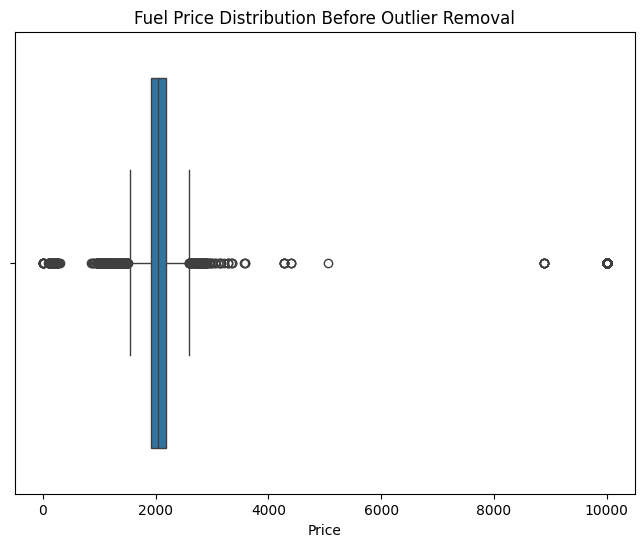

Original Data Shape: (341820, 14)
Filtered Data Shape: (338608, 14)


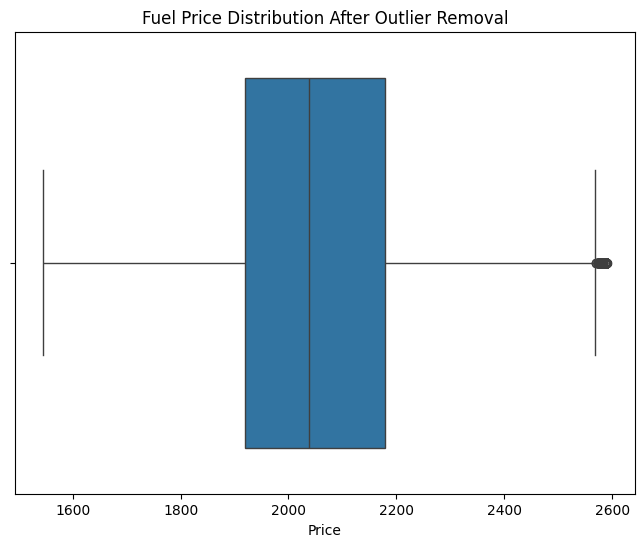

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price'])
plt.title('Fuel Price Distribution Before Outlier Removal')
plt.show()

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to exclude outliers
df_filtered = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Display the shape before and after filtering
print(f"Original Data Shape: {df.shape}")
print(f"Filtered Data Shape: {df_filtered.shape}")

plt.figure(figsize=(8,6))
sns.boxplot(x=df_filtered['Price'])
plt.title('Fuel Price Distribution After Outlier Removal')
plt.show()

In [20]:
suburb_qry = 'Coomera'
ftype = 'PULP 98 RON'
df_su = df_filtered[df_filtered['Site_Suburb']==suburb_qry]
df_su_ft = df_su[df_su['Fuel_Type'] == ftype]
print(df_su_ft)

          SiteId               Site_Name     Site_Brand  Sites_Address_Line_1   
4       61401007        7-Eleven Coomera       7 Eleven       Pacific Highway  \
5       61401007        7-Eleven Coomera       7 Eleven       Pacific Highway   
221     61401020   Ampol Foodary Coomera          Ampol    22 Heathwood Drive   
222     61401020   Ampol Foodary Coomera          Ampol    22 Heathwood Drive   
24563   61477711   Coles Express Coomera  Coles Express  Lot 4 233 Foxwell Rd   
...          ...                     ...            ...                   ...   
339198  61478032    Pearl Energy Pimpama   Pearl Energy     404 Yawalpah Road   
341502  61478203  Costco Fuel Gold Coast         Costco         47 Creek Road   
341503  61478203  Costco Fuel Gold Coast         Costco         47 Creek Road   
341504  61478203  Costco Fuel Gold Coast         Costco         47 Creek Road   
341506  61478203  Costco Fuel Gold Coast         Costco         47 Creek Road   

       Site_Suburb Site_Sta

/var/folders/wz/zmc0gwmn2n57xys67hh2y13c0000gn/T/ipykernel_1751/2645194996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_su_ft['Date'] = pd.to_datetime(df_su_ft[['Year', 'Month', 'Day']])


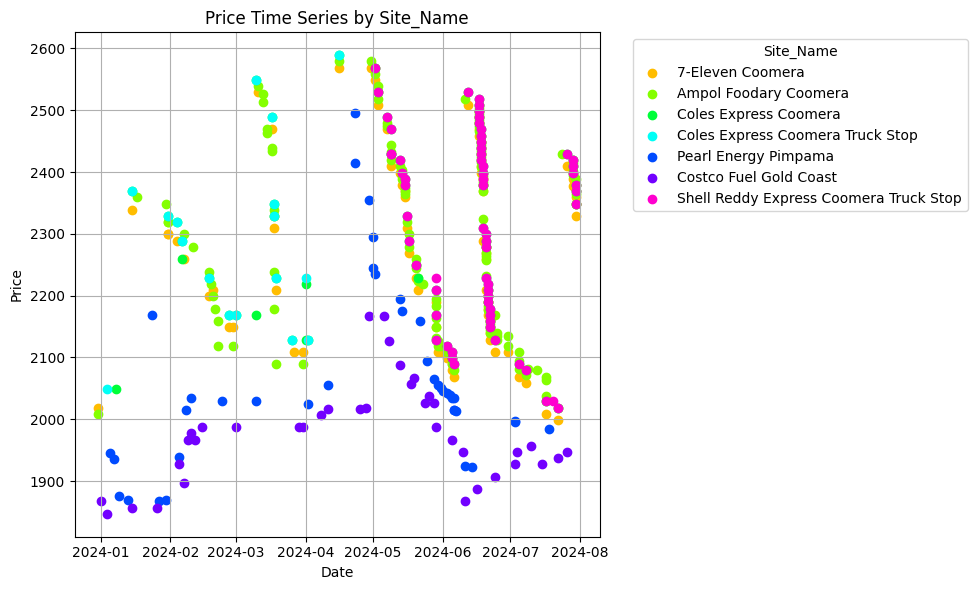

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Combine Year, Month, and Day into a datetime column
df_su_ft['Date'] = pd.to_datetime(df_su_ft[['Year', 'Month', 'Day']])

# Step 2: Set the Date column as the index (optional for scatter plot)
df_su_ft.set_index('Date', inplace=True)

# Step 3: Create a scatter plot with different colors for each Site_Name
plt.figure(figsize=(10, 6))

# Use seaborn's color palette for distinct colors
colors = sns.color_palette("hsv", len(df_su_ft['Site_Name'].unique()))

# Loop through each unique Site_Name and plot them separately with different colors
for i, site_name in enumerate(df_su_ft['Site_Name'].unique()):
    subset = df_su_ft[df_su_ft['Site_Name'] == site_name]
    plt.scatter(subset.index, subset['Price'], color=colors[i], label=site_name)

# Step 4: Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Time Series by Site_Name')
plt.legend(title='Site_Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.grid(True)

# Step 5: Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap with the legend
plt.show()

In [4]:
# Filter for July 2024 data
df_july_2024 = df_filtered[df_filtered['Month'] == 7]
df_july_2024 = df_july_2024[df_july_2024['Year'] == 2024]


# Function to get top 10 suburbs by average fuel price for a given fuel type
def get_top_suburbs_by_fuel_type(fuel_type):
    # Filter data for the given fuel type
    df_fuel_type = df_july_2024[df_july_2024['Fuel_Type'] == fuel_type]
    
    # Group by 'Site_Suburb' and calculate average price
    df_avg_price = df_fuel_type.groupby('Site_Suburb')['Price'].mean().reset_index()
    
    # Sort by average price in descending order and get the top 10
    df_avg_price = df_avg_price.sort_values(by='Price', ascending=False).head(10)
    
    # Add a rank column
    df_avg_price['Rank'] = df_avg_price['Price'].rank(ascending=False)
    
    return df_avg_price

# Example usage
fuel_type = "Unleaded"  # Replace with desired fuel type
top_suburbs = get_top_suburbs_by_fuel_type(fuel_type)

# Display the top 10 suburbs and their average prices
print(top_suburbs)

       Site_Suburb        Price  Rank
414       Musgrave  2570.000000   1.0
183     Doomadgee   2554.000000   2.0
487    Rocky Point  2411.000000   3.5
208  Evans Landing  2411.000000   3.5
544   THargomindah  2340.000000   5.0
187        Dunwich  2219.000000   6.0
206       Eromanga  2189.000000   7.0
415     Muttabarra  2180.000000   8.5
462        Quilpie  2180.000000   8.5
428      Normanton  2135.333333  10.0


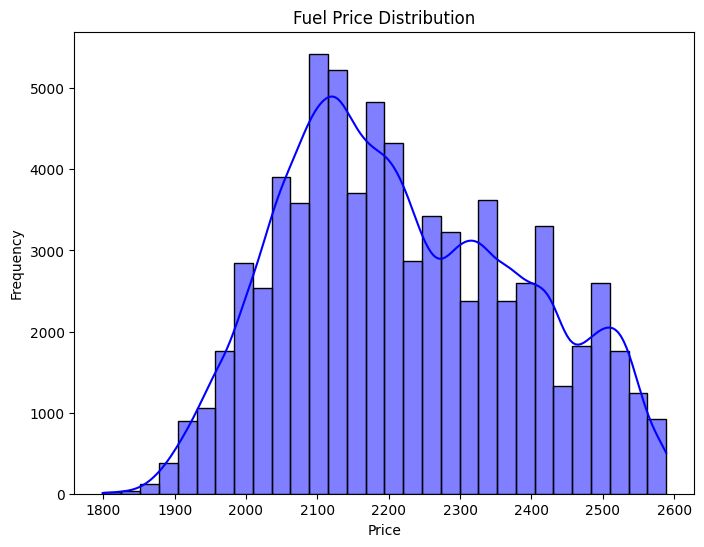

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(8,6))
sns.histplot(df_filtered[df_filtered['Fuel_Type']=='PULP 98 RON']['Price'], kde=True, bins=30, color='blue')
plt.title('Fuel Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/var/folders/wz/zmc0gwmn2n57xys67hh2y13c0000gn/T/ipykernel_1751/2310321039.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Price', data=df_july_2024, estimator='mean', ci=None)


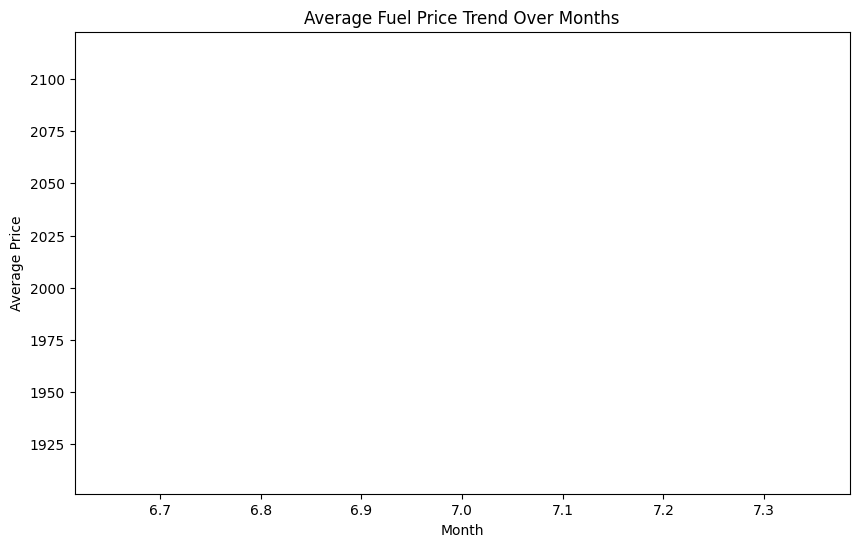

In [14]:
# Price trend over months
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Price', data=df_july_2024, estimator='mean', ci=None)
plt.title('Average Fuel Price Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

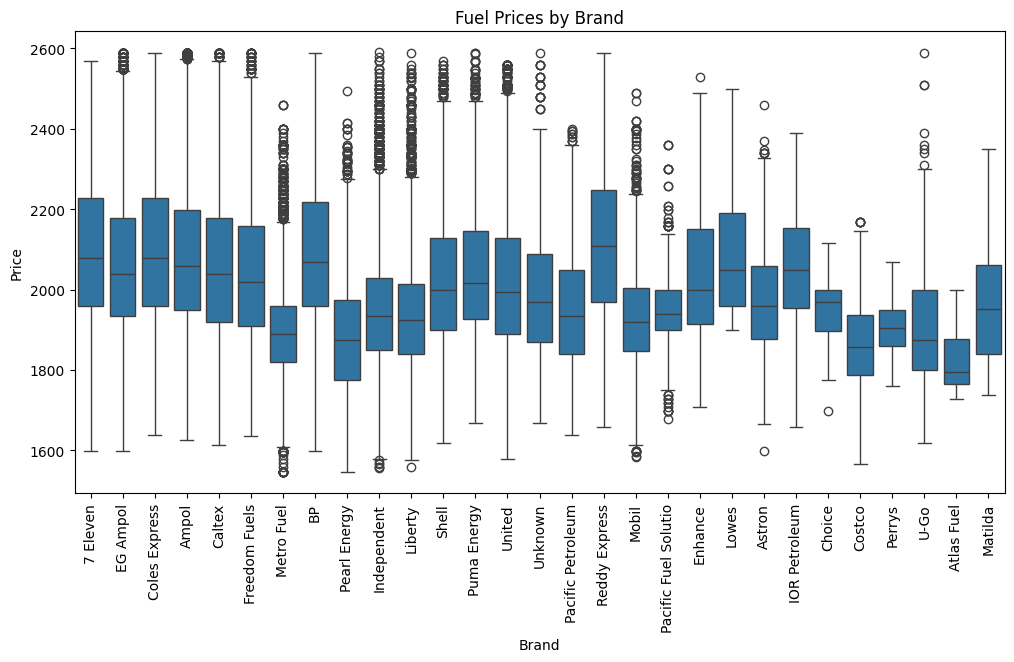

In [15]:
# Average price by brand
plt.figure(figsize=(12,6))
sns.boxplot(x='Site_Brand', y='Price', data=df_filtered)
plt.title('Fuel Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

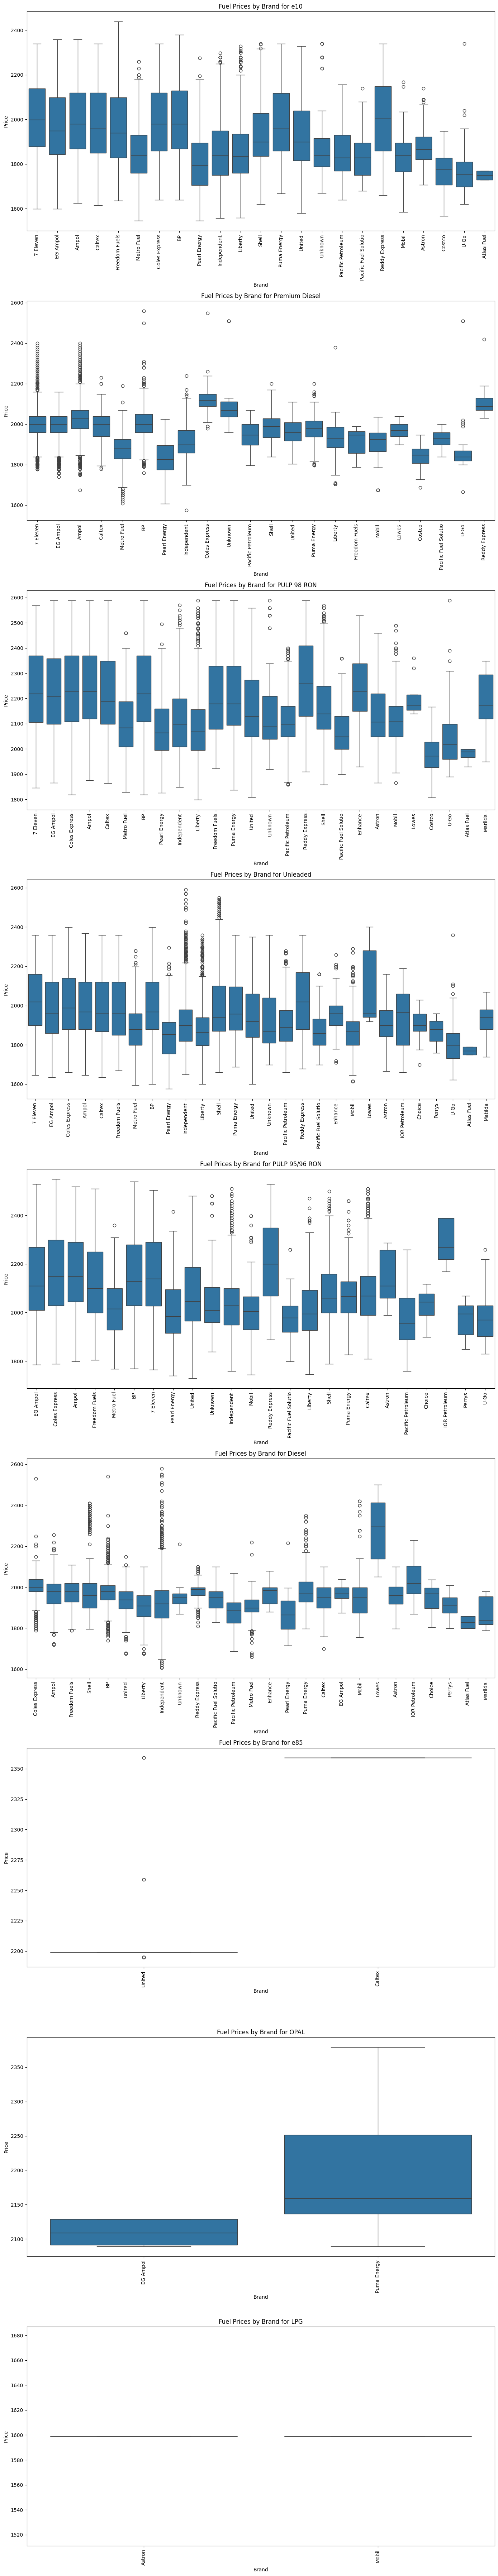

In [16]:
# Get unique fuel types from the filtered DataFrame
unique_fuel_types = df_filtered['Fuel_Type'].unique()

# Set the figure size for multiple plots
plt.figure(figsize=(14, 8 * len(unique_fuel_types)))

# Create a boxplot for each fuel type
for i, fuel_type in enumerate(unique_fuel_types, 1):
    plt.subplot(len(unique_fuel_types), 1, i)
    sns.boxplot(x='Site_Brand', y='Price', data=df_filtered[df_filtered['Fuel_Type'] == fuel_type])
    plt.title(f'Fuel Prices by Brand for {fuel_type}')
    plt.xlabel('Brand')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

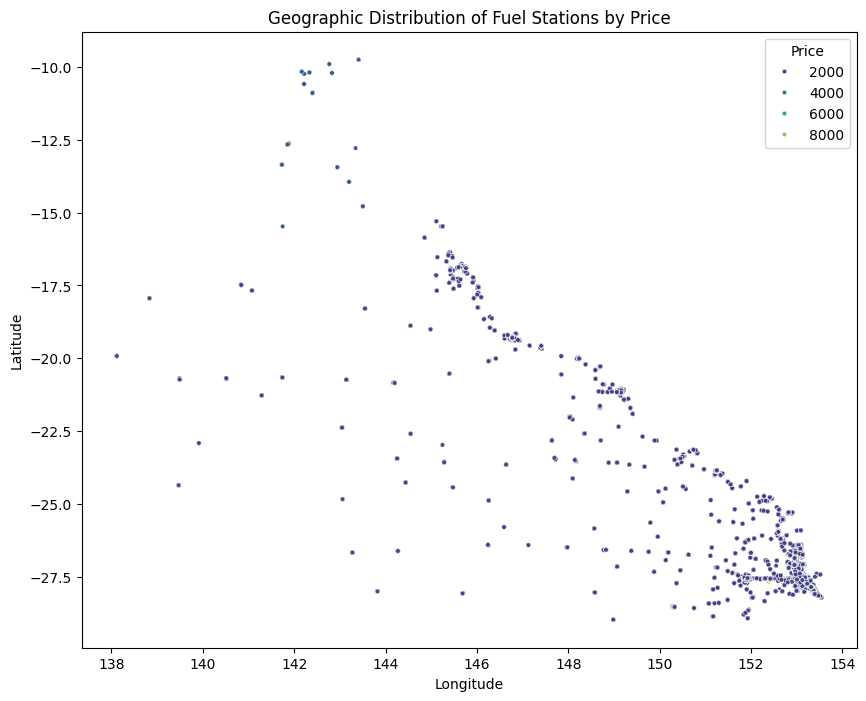

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Site_Longitude', y='Site_Latitude', hue='Price', palette='viridis', data=df, s=10)
plt.title('Geographic Distribution of Fuel Stations by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar().set_label('Price')
plt.show()

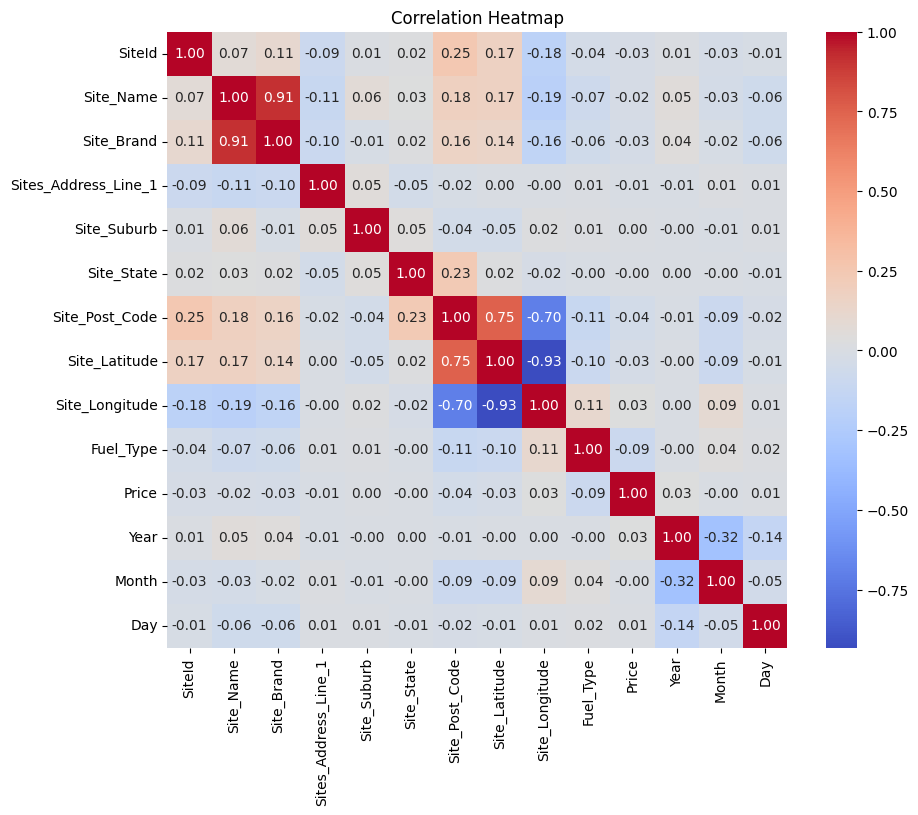

In [11]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

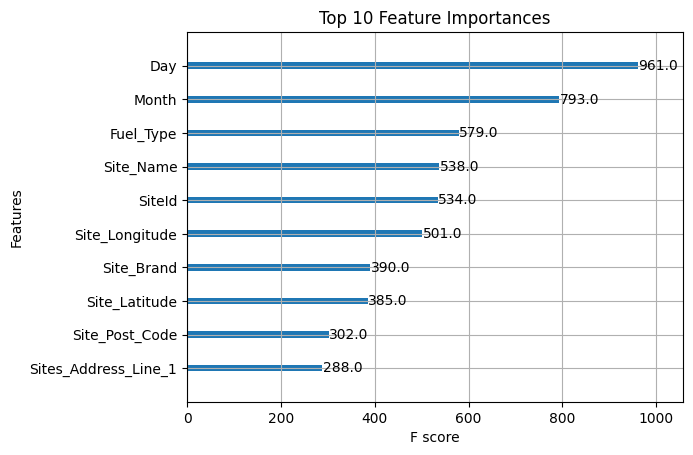

In [12]:
# Plot feature importance from the trained XGBoost model
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Separate features and target from the filtered DataFrame
X = df_filtered.drop('Price', axis=1)
y = df_filtered['Price']

# Continue with the same train-test split and XGBoost model training process as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model (same as before)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)
xgb_model = xgb.train(params, train_data, num_boost_round=100, evals=[(test_data, 'test')])

# Evaluate the model
y_pred = xgb_model.predict(test_data)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE after outlier removal: {rmse}")